In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e, sin
import torch
from SourceCode.utilities import nth_derivative, plot_two_curves
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time


n_epochs = 10
n_points = 10
dh = 1e-3

# №0

$$ x'= -y $$
$$ y' = x + cost(t) $$
$$ x(0) = 0$$ $$y(0) = 0$$
$$t \in [0,1] $$
True_solution: $$x = -\frac{1}{2}tsin(t)$$ $$y = tcos(t) + \frac{1}{2}sin(t)$$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual1 = lambda t, x, y: nth_derivative(x, t, 1) + y(t)
main_eq_residual2 = lambda t, x, y: nth_derivative(y, t, 1) - x(t) - torch.cos(t)
main_eq_residuals = [main_eq_residual1, main_eq_residual2]
n_points = 20
true_sol1 = lambda x: -1/2 * x * torch.sin(x)
true_sol2 = lambda x: 1/2*(x*torch.cos(x) + torch.sin(x))
true_solutions = [true_sol1, true_sol2]
main_domain = OneDimensionalSimpleDomain(left_bound + dh, 
                                         right_bound, 
                                         n_points)


first_init_cond_res = lambda x, nn_model1, nn_model2: nn_model1(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, 
                                           first_init_cond_res)

second_init_cond_res = lambda x, nn_model1, nn_model2: nn_model2(x) - 0
second_init_cond = OnePointInitialCondition(left_bound, 
                                            second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, 
                                     main_eq_residuals, 
                                     boundary_conditions)


nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 3.880740769091062e-05
Valid max absolute error |Appr(x)-y(x)|: 3.867792111122981e-05
MAPE on train data: 0.004089315189048648 %
MAPE on validation data: 0.004085803811904043 %
Max residual square loss on train at last epoch: 0.0003738999366760254 


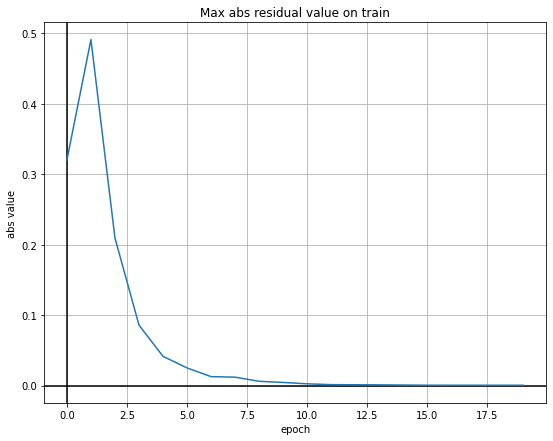

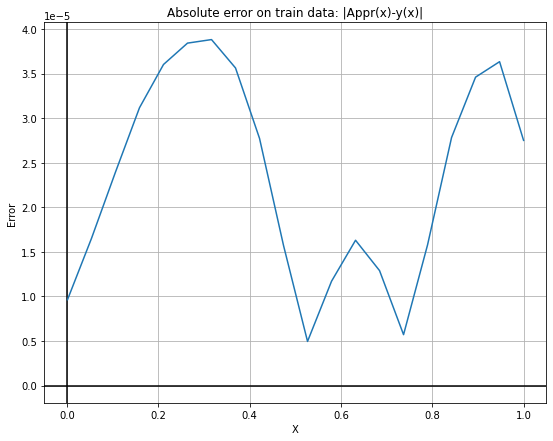

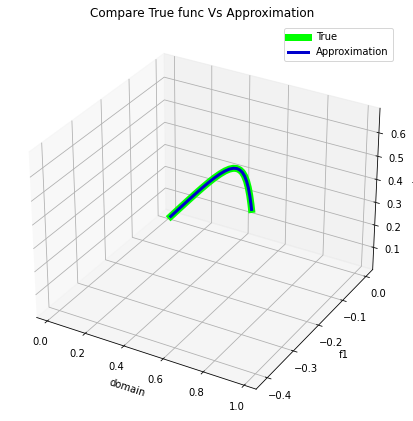

train data
       Input  Analytical_x1    ANN_x1  Analytical_x2    ANN_x2     Error
0   0.001000  -5.000000e-07  0.000002       0.001000  0.000991  0.000010
1   0.053579  -1.434665e-03 -0.001435       0.053528  0.053511  0.000017
2   0.106158  -5.624172e-03 -0.005613       0.105759  0.105738  0.000024
3   0.158737  -1.254585e-02 -0.012520       0.157406  0.157388  0.000031
4   0.211316  -2.216139e-02 -0.022126       0.208181  0.208173  0.000036
5   0.263895  -3.441747e-02 -0.034379       0.257801  0.257806  0.000038
6   0.316474  -4.924604e-02 -0.049211       0.305987  0.306004  0.000039
7   0.369053  -6.656455e-02 -0.066537       0.352468  0.352490  0.000036
8   0.421632  -8.627629e-02 -0.086257       0.396978  0.396998  0.000028
9   0.474211  -1.082709e-01 -0.108260       0.439260  0.439271  0.000016
10  0.526789  -1.324245e-01 -0.132420       0.479066  0.479064  0.000005
11  0.579368  -1.586008e-01 -0.158600       0.516158  0.516146  0.000012
12  0.631947  -1.866511e-01 -0.186652   

In [4]:
report = ReportMaker(true_solutions, 
                     nn_models, main_eq, 
                     loss_train, 
                     loss_valid, 
                     main_domain, 
                     num_epochs=n_points,
                    plot2functions=plot_two_curves)
report.make_report()
report.print_comparison_table()

# № 1

$$ D^{0.5}y_1 = x^{0.5}cos(x)+y_1+y_2 -(e^x+sin(x)) $$
$$ D^{0.75}y_2 = x^{0.25}e^x+y_1-sin(x) $$
$$ <=> $$
$$ x^{0.5}y_1'(x)= x^{0.5}cos(x)+y_1+y_2 -(e^x+sin(x))$$
$$ x^{0.25}y_2'(x) = x^{0.25}e^x+y_1-sin(x) $$
$$ y_1(0) = 0$$ $$y_2(0) = 1$$
$$x \in [0,1] $$
True_solution: $$y_1 = sin(x)$$ $$y_2 = e^x$$

In [14]:
left_bound = 0
right_bound = 1
main_eq_residual1 = lambda x, y1, y2: (torch.pow(x,0.5)*nth_derivative(y1, x, 1)
                                       -x**(0.5)*torch.cos(x)
                                       - y1(x)-y2(x) + torch.exp(x) + torch.sin(x))
main_eq_residual2 = lambda x, y1, y2: (x**(0.25)*nth_derivative(y2, x, 1) - 
                                       pow(x,0.25)*torch.exp(x)
                                      -y1(x) + torch.sin(x))
main_eq_residuals = [main_eq_residual1, main_eq_residual2]
n_points = 100
true_sol1 = lambda x: torch.sin(x)
true_sol2 = lambda x: torch.exp(x)
true_solutions = [true_sol1, true_sol2]
main_domain = OneDimensionalSimpleDomain(left_bound + dh, 
                                         right_bound, 
                                         n_points)


first_init_cond_res = lambda x, nn_model1, nn_model2: nn_model1(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model1, nn_model2: (nn_model2(x) 
                                                        - torch.tensor([1.0], requires_grad=True))
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residuals, boundary_conditions)

n_epochs = 30
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs=n_epochs)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.003972001373767853
Valid max absolute error |Appr(x)-y(x)|: 0.003956765867769718
MAPE on train data: 0.09682938689365983 %
MAPE on validation data: 0.09681672672741115 %
Max residual square loss on train at last epoch: 0.0012249872088432312 


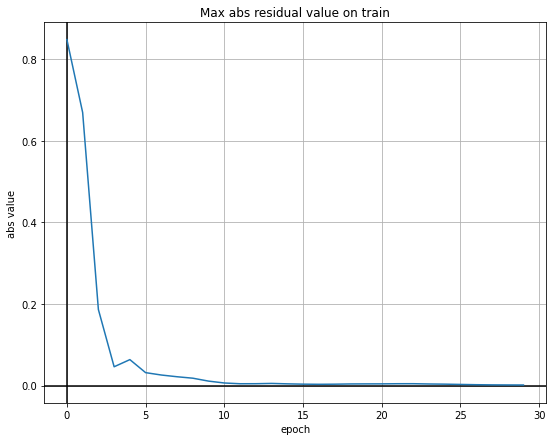

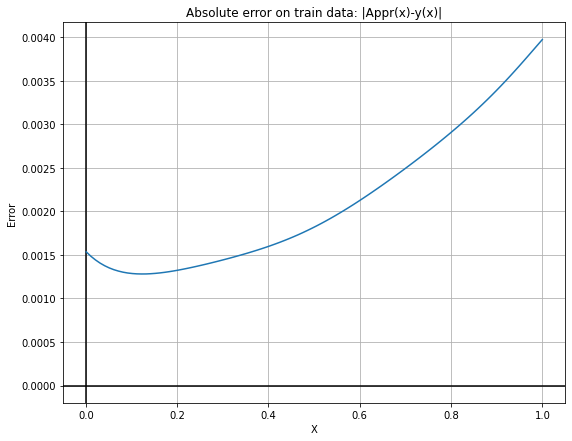

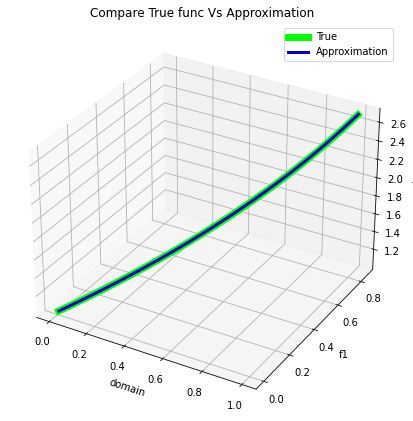

train data
       Input  Analytical_x1    ANN_x1  Analytical_x2    ANN_x2     Error
0   0.001000       0.001000  0.002070       1.001001  0.999900  0.001535
1   0.011091       0.011091  0.012161       1.011153  1.010124  0.001485
2   0.021182       0.021180  0.022252       1.021408  1.020443  0.001442
3   0.031273       0.031268  0.032341       1.031767  1.030860  0.001406
4   0.041364       0.041352  0.042428       1.042231  1.041375  0.001375
..       ...            ...       ...            ...       ...       ...
95  0.959636       0.818983  0.822482       2.610747  2.612035  0.003729
96  0.969727       0.824732  0.828281       2.637225  2.638553  0.003789
97  0.979818       0.830396  0.833996       2.663972  2.665339  0.003850
98  0.989909       0.835976  0.839627       2.690990  2.692392  0.003911
99  1.000000       0.841471  0.845175       2.718282  2.719716  0.003972

[100 rows x 6 columns]


In [15]:
report = ReportMaker(true_solutions, 
                     nn_models, main_eq, 
                     loss_train, 
                     loss_valid, 
                     main_domain, 
                     num_epochs=n_epochs,
                    plot2functions=plot_two_curves)
report.make_report()
report.print_comparison_table()